In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Preparacion del Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_hotels_train = pd.read_csv('drive/MyDrive/hotels_train.csv')

In [23]:
#Tipo de variable 


##Mostramos las variables cuantitativas

In [14]:
lista_cuantitativas = ['adults','children', 'babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','adr','required_car_parking_spaces','total_of_special_requests',  'lead_time','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights', 'days_in_waiting_list']
df_cuantitativas = df_hotels_train[lista_cuantitativas] #Primero separamos las cuantitvas
df_cuantitativas

,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,days_in_waiting_list
0,1,0.0,0,0,0,0,115.50,0,1,49,37,5,1,2,0
1,2,0.0,0,0,0,0,42.00,1,0,4,44,31,0,1,0
2,2,2.0,0,0,0,0,229.00,0,2,25,42,13,0,1,0
3,2,0.0,0,0,0,0,75.00,0,0,26,51,12,2,5,0
4,2,0.0,0,0,0,0,75.00,0,1,104,12,19,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,2,0.0,0,0,0,0,48.00,0,1,24,4,27,0,2,0
61909,1,0.0,0,0,0,0,149.00,0,0,0,36,2,0,1,0
61910,1,0.0,0,0,0,0,95.00,0,0,10,19,8,1,2,0
61911,2,0.0,0,0,0,0,36.05,0,0,143,41,10,2,5,0


Mostramos media, moda y mediana

In [5]:
df_cuantitativas.mean()

adults                              1.862791
children                            0.104896
babies                              0.007155
previous_cancellations              0.114790
previous_bookings_not_canceled      0.115420
booking_changes                     0.195952
adr                               102.383773
required_car_parking_spaces         0.049957
total_of_special_requests           0.523703
lead_time                         112.248187
arrival_date_week_number           27.218080
arrival_date_day_of_month          15.785812
stays_in_weekend_nights             0.924135
stays_in_week_nights                2.510054
days_in_waiting_list                2.638977
dtype: float64

In [6]:
df_cuantitativas.mode().squeeze()

adults                             2.0
children                           0.0
babies                             0.0
previous_cancellations             0.0
previous_bookings_not_canceled     0.0
booking_changes                    0.0
adr                               62.0
required_car_parking_spaces        0.0
total_of_special_requests          0.0
lead_time                          0.0
arrival_date_week_number          33.0
arrival_date_day_of_month         17.0
stays_in_weekend_nights            0.0
stays_in_week_nights               2.0
days_in_waiting_list               0.0
Name: 0, dtype: float64

In [7]:
df_cuantitativas.median()

adults                             2.0
children                           0.0
babies                             0.0
previous_cancellations             0.0
previous_bookings_not_canceled     0.0
booking_changes                    0.0
adr                               95.0
required_car_parking_spaces        0.0
total_of_special_requests          0.0
lead_time                         78.0
arrival_date_week_number          28.0
arrival_date_day_of_month         16.0
stays_in_weekend_nights            1.0
stays_in_week_nights               2.0
days_in_waiting_list               0.0
dtype: float64

##Mostramos las variables cualitativas

In [8]:
df_cualitativas = df_hotels_train.drop(lista_cuantitativas, axis=1)
df_cualitativas

,hotel,arrival_date_year,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,reservation_status,reservation_status_date,id,is_canceled
0,City Hotel,2016,September,BB,USA,Online TA,TA/TO,0,D,D,No Deposit,9.0,NaN,Transient,Canceled,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,2015,October,BB,PRT,Groups,Direct,0,A,A,No Deposit,NaN,NaN,Transient,Check-Out,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,2016,October,BB,CHE,Online TA,TA/TO,0,F,F,No Deposit,9.0,NaN,Transient,Check-Out,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,2016,December,BB,PRT,Groups,TA/TO,0,A,A,Non Refund,154.0,NaN,Transient,Canceled,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,2017,March,BB,FRA,Offline TA/TO,TA/TO,0,A,A,No Deposit,20.0,NaN,Transient-Party,Check-Out,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,2017,January,BB,ESP,Online TA,TA/TO,0,A,D,No Deposit,240.0,NaN,Transient,Canceled,2017-01-23,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
61909,City Hotel,2016,September,SC,FRA,Online TA,TA/TO,0,A,A,No Deposit,NaN,NaN,Transient,Check-Out,2016-09-03,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
61910,City Hotel,2017,May,BB,FRA,Aviation,Corporate,0,A,A,No Deposit,NaN,153.0,Transient,Check-Out,2017-05-11,76fb0e83-59df-43ee-9c33-aec51030ed45,0
61911,Resort Hotel,2015,October,BB,PRT,Groups,TA/TO,0,A,A,Non Refund,96.0,NaN,Transient,Canceled,2015-07-08,01906859-1094-4e37-b13e-b015b594d159,1


In [ ]:
for c in df_cualitativas.columns:
    print("----"+c+"---")
    print(df_cualitativas[c].value_counts())
    print()

----hotel---
City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64

----arrival_date_year---
2016    29362
2017    21066
2015    11485
Name: arrival_date_year, dtype: int64

----arrival_date_month---
August       7176
July         6524
May          6159
April        5878
October      5863
June         5772
September    5619
March        4899
February     4125
December     3493
November     3404
January      3001
Name: arrival_date_month, dtype: int64

----meal---
BB           47837
HB            7452
SC            5556
Undefined      591
FB             477
Name: meal, dtype: int64

----country---
PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64

----market_segment---
Online TA        29269
Offline TA/TO    12384
Groups           11545
Direct            5757
Corporate         2484
Complementary      359
Aviation           113
Undefined   

##Analisis de correlacion y graficos de distribucion de las variables

In [ ]:
#df_hotels_train.hist(figsize=(20,20), bins=27)

In [40]:
#Realizamos un histograma para poder ver las variables cuantitativas para poder observar su distribucion 


Analisis de la correlacion entre variables

In [ ]:
correlacion_todas = df_hotels_train.corr()
display(correlacion_todas)

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
lead_time,1.000000,0.023186,0.134793,-0.006937,0.059463,0.140110,0.110942,-0.046058,-0.022872,-0.108033,0.094634,-0.068102,-0.019736,-0.078786,0.150773,0.166423,-0.094559,-0.113772,-0.122760,0.293816
arrival_date_year,0.023186,1.000000,-0.540542,0.002326,0.027066,0.040803,0.026576,0.059412,-0.013745,-0.004587,-0.142232,0.027109,0.027285,0.081634,0.243066,-0.058523,0.217409,-0.011620,0.107899,0.019923
arrival_date_week_number,0.134793,-0.540542,1.000000,0.057730,0.014127,0.012200,0.025886,0.006355,0.016215,-0.022037,0.045530,-0.023897,0.012086,-0.043968,-0.040886,0.019328,0.075427,0.001424,0.029283,0.008357
arrival_date_day_of_month,-0.006937,0.002326,0.057730,1.000000,-0.015518,-0.026449,0.002449,0.013991,0.002568,-0.005230,-0.034516,-0.002026,0.009522,0.002600,0.049011,0.027754,0.033695,0.000295,0.007744,-0.007371
stays_in_weekend_nights,0.059463,0.027066,0.014127,-0.015518,1.000000,0.488710,0.083397,0.051987,0.021991,-0.080412,-0.011110,-0.037958,0.043753,0.150907,0.066591,-0.057509,0.061136,-0.014228,0.072150,0.001279
stays_in_week_nights,0.140110,0.040803,0.012200,-0.026449,0.488710,1.000000,0.087992,0.058278,0.021390,-0.088363,-0.013417,-0.045190,0.070094,0.197293,0.211214,-0.004139,0.082910,-0.021657,0.073356,0.028439
adults,0.110942,0.026576,0.025886,0.002449,0.083397,0.087992,1.000000,0.029215,0.014812,-0.129198,-0.003197,-0.096896,-0.045378,-0.030557,0.181019,-0.009420,0.221538,0.010593,0.107599,0.060179
children,-0.046058,0.059412,0.006355,0.013991,0.051987,0.058278,0.029215,1.000000,0.028946,-0.029847,-0.027296,-0.019686,0.058871,0.056140,0.033754,-0.035480,0.350482,0.045272,0.080017,0.006242
babies,-0.022872,-0.013745,0.016215,0.002568,0.021991,0.021390,0.014812,0.028946,1.000000,-0.008925,-0.007734,-0.005790,0.088186,0.036594,0.026146,-0.010863,0.033735,0.036372,0.093348,-0.032034
is_repeated_guest,-0.108033,-0.004587,-0.022037,-0.005230,-0.080412,-0.088363,-0.129198,-0.029847,-0.008925,1.000000,0.075981,0.406030,0.008407,0.018729,-0.233782,-0.021828,-0.132263,0.073732,0.015965,-0.090492


Analisimos el target con el resto de las variables

In [ ]:
correlations = df_hotels_train.corr()['is_canceled']

display(correlations)

lead_time                         0.293816
arrival_date_year                 0.019923
arrival_date_week_number          0.008357
arrival_date_day_of_month        -0.007371
stays_in_weekend_nights           0.001279
stays_in_week_nights              0.028439
adults                            0.060179
children                          0.006242
babies                           -0.032034
is_repeated_guest                -0.090492
previous_cancellations            0.099613
previous_bookings_not_canceled   -0.065868
booking_changes                  -0.159315
agent                            -0.086176
company                          -0.040010
days_in_waiting_list              0.050827
adr                               0.049206
required_car_parking_spaces      -0.225915
total_of_special_requests        -0.244997
is_canceled                       1.000000
Name: is_canceled, dtype: float64

Hacemos un grafico para dejar mas en claro la correlacion de nuestras variables con nuestra variable target

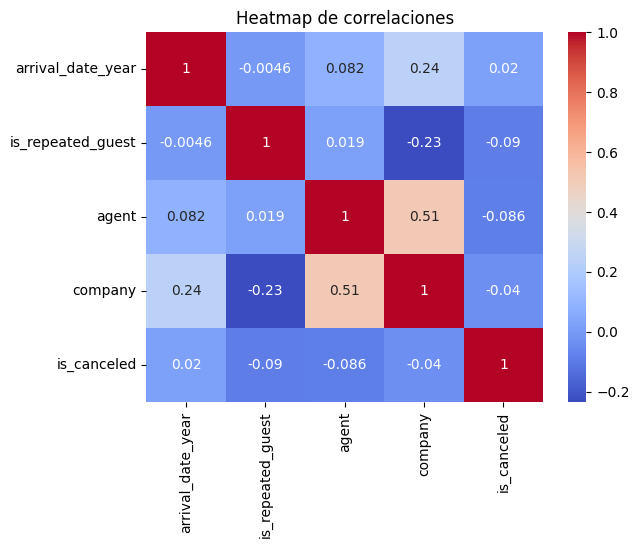

In [48]:
corr_matrix = df_hotels_train.drop(lista_cuantitativas, axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# personalizar el heatmap
plt.title('Heatmap de correlaciones')
plt.show()

##Datos Faltantes